In [30]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(1)
from keras import models
from keras import layers
from keras import optimizers
import os
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Step 1 : import data
data=pd.read_csv('data/stock.csv')
print(data.shape)
data.head()
data = data[['AZN']]
data.head()

(3290, 9)


,AZN
0,43.829044
1,44.240784
2,44.921402
3,46.425518
4,46.568356


In [64]:
# Step 2 : split data
data = np.array(data.values.astype('float32'))
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data).flatten()
n = len(data)
# Point for splitting data into train and test
split = int(n * 0.8)
train_data = data[range(split)]
test_data = data[split:]

In [114]:
# Step 3 : Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps * rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
model = input("choose between 3 model types (RNN, LSTM, GRU): ")
if model == "RNN":
## This is about Keras SimpleRNN:
    def create_model(hidden_units, dense_units, input_shape, activation):
        model = Sequential()
        model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
        model.add(Dense(units=dense_units, activation=activation[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
elif model == "LSTM":
    def create_model(hidden_units, dense_units, input_shape, activation):
        model = Sequential()
        model.add(LSTM(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
        model.add(Dense(units=dense_units, activation=activation[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
else:
    def create_model(hidden_units, dense_units, input_shape, activation):
        model = Sequential()
        model.add(GRU(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
        model.add(Dense(units=dense_units, activation=activation[1]))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

choose between 3 model types (RNN, LSTM, GRU): GRU


In [115]:
## Step 4: Create RNN Model And Train
## reuse the function: creat_RNN()
model = create_model(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
219/219 - 10s - loss: 0.0069 - 10s/epoch - 47ms/step
Epoch 2/20
219/219 - 1s - loss: 0.0014 - 1s/epoch - 6ms/step
Epoch 3/20
219/219 - 1s - loss: 0.0010 - 1s/epoch - 6ms/step
Epoch 4/20
219/219 - 1s - loss: 9.8429e-04 - 1s/epoch - 5ms/step
Epoch 5/20
219/219 - 1s - loss: 8.5398e-04 - 1s/epoch - 6ms/step
Epoch 6/20
219/219 - 1s - loss: 7.8150e-04 - 1s/epoch - 6ms/step
Epoch 7/20
219/219 - 1s - loss: 7.4900e-04 - 1s/epoch - 6ms/step
Epoch 8/20
219/219 - 1s - loss: 6.6497e-04 - 1s/epoch - 6ms/step
Epoch 9/20
219/219 - 1s - loss: 6.3397e-04 - 1s/epoch - 6ms/step
Epoch 10/20
219/219 - 1s - loss: 5.5917e-04 - 1s/epoch - 6ms/step
Epoch 11/20
219/219 - 1s - loss: 5.1979e-04 - 1s/epoch - 6ms/step
Epoch 12/20
219/219 - 1s - loss: 4.6718e-04 - 1s/epoch - 6ms/step
Epoch 13/20
219/219 - 1s - loss: 4.3562e-04 - 1s/epoch - 6ms/step
Epoch 14/20
219/219 - 1s - loss: 3.9828e-04 - 1s/epoch - 6ms/step
Epoch 15/20
219/219 - 1s - loss: 3.5342e-04 - 1s/epoch - 6ms/step
Epoch 16/20
219/219 - 1s - l

In [116]:
## Step 5: Compute And Print The Root Mean Square Error
## use the function: print_error()
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

In [117]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error of Training dataset and Testing dataset:
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 4ms/step
Train RMSE: 0.015 RMSE
Test RMSE: 0.111 RMSE


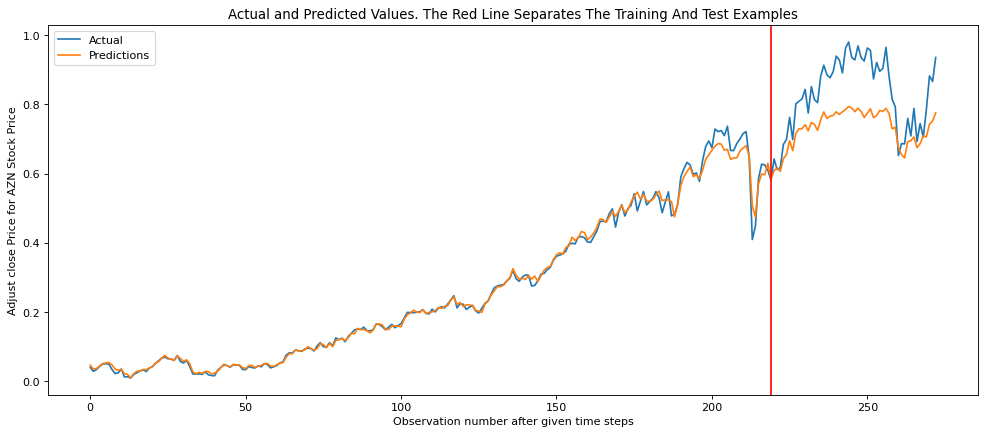

In [118]:
## Step 6: View The result
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict): ## define the content of the plot
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Adjust close Price for AZN Stock Price')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)
plt.show() ## show the plot

In [83]:
data=pd.read_csv('data/azn.csv')
data.head()

,Date,AZN.Open,AZN.High,AZN.Low,AZN.Close,AZN.Volume,AZN.Adjusted
0,04/01/2010,23.709999,23.764999,23.575001,23.705000,2606200.0,13.440908
1,05/01/2010,23.434999,23.465000,23.150000,23.225000,2666600.0,13.168744
2,06/01/2010,22.915001,23.045000,22.785000,23.040001,3020800.0,13.063849
3,07/01/2010,23.250000,23.325001,23.120001,23.290001,4454600.0,13.205604
4,08/01/2010,23.270000,23.415001,23.174999,23.389999,2675600.0,13.262300


In [84]:

## set training and testing dataset
global lag     #forcast time lag
lag=12

nrow=data.shape[0]
train_index=list(range(int(0.7*(nrow-lag))))
validation_index=list(range(int(0.7*(nrow-lag)),int(0.9*(nrow-lag))))
test_index=list(range(int(0.9*(nrow-lag)),(nrow-lag)))

def generate_X_y(data,ex_rate):
    tmp=data[ex_rate]
    print('Raw data mean:',np.mean(tmp),'\nRaw data std:',np.std(tmp))
    tmp=(tmp-np.mean(tmp))/np.std(tmp)

    X=np.zeros((nrow-lag,lag))
    for i in range(nrow-lag):X[i,:lag]=tmp.iloc[i:i+lag]
    y=np.array(tmp[lag:]).reshape((-1,1))
    return (X,y)

In [85]:
### CHECK train data of X and Y
X,y=generate_X_y(data,'AZN.Close')
X_train,y_train=X[train_index,:],y[train_index,:]
X_validation,y_validation=X[validation_index,:],y[validation_index,:]
X_test,y_test=X[test_index,:],y[test_index,:]

Raw data mean: 36.80589211854097 
Raw data std: 13.013520313929487


In [86]:
## get the valiedate and test benchmark value
## define drift validate benchmark:
### CHECK with another method:
def training_performance(model, training_history, epochs):
    test_MAE = np.mean(np.abs(y_test - model.predict(X_test.reshape(-1, lag, 1))))
    timestep = range(1, epochs + 1)
    plt.figure(figsize=(10, 8), facecolor='white')
    plt.subplot(2, 1, 1)
    plt.plot(timestep, np.log(training_history.history['val_mae']), 'b', label='Validation Mean Absolute Error')
    plt.plot(timestep, np.log(training_history.history['mae']), 'bo', label='Training Mean Absolute Error')
    plt.hlines(np.log(drift_validate_benchmark), xmin=timestep[0], xmax=timestep[-1], colors='coral',
               label='Validation Drift Benchmark')
    plt.hlines(np.log(mean_validate_benchmark), xmin=timestep[0], xmax=timestep[-1], colors='lightblue',
               label='Validation Mean Benchmark')
    plt.hlines(np.log(test_MAE), xmin=timestep[0], xmax=timestep[-1], colors='purple', label='Testing Mean Absolute Error')
    plt.ylabel('logged Mean Absolute Error')
    plt.xlabel('Epoch Value')
    plt.legend(loc='upper right')
    plt.subplot(2, 1, 2)
    plt.hlines(test_MAE, xmin=timestep[0], xmax=timestep[-1], colors='purple', label='Testing Mean Absolute Error')
    plt.hlines(drift_test_benchmark, xmin=timestep[0], xmax=timestep[-1], colors='coral', label='Test Drift Benchmark')
    plt.hlines(mean_test_benchmark, xmin=timestep[0], xmax=timestep[-1], colors='lightblue',
               label='Test Mean Benchmark')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='right')
    plt.show()

def get_Mae_benchmark(X,y):
    mean_benchmark=np.mean(np.abs(np.mean(X,0)-y))
    drift_benchmark=np.mean(np.abs(X[:,-1]-y))
    return(mean_benchmark,drift_benchmark)

mean_validate_benchmark,drift_validate_benchmark=get_Mae_benchmark(X_validation,y_validation)
mean_test_benchmark,drift_test_benchmark=get_Mae_benchmark(X_test,y_test)



def plot_prediction(model, ex_rate):
    tmp = data[ex_rate]
    plt.figure(figsize=(10, 8), facecolor='white')
    prediction = model.predict(X_test.reshape(-1, lag, 1))
    prediction = prediction * np.std(tmp) + np.mean(tmp)
    y_true = y_test * np.std(tmp) + np.mean(tmp)
    plt.plot(list(range(len(prediction))), prediction, color='coral', label='Prediction')
    plt.plot(list(range(len(y_true))), y_true, color='purple', label='True Value')
    xticks = np.arange(0, len(y_true), 7)
    plt.xticks(xticks, labels=data.Date.iloc[test_index].iloc[xticks], rotation=90)
    plt.legend()
    plt.show()

Epoch 1/82
128/128 [==============================] - 3s 11ms/step - loss: 0.0022 - mae: 0.0316 - val_loss: 0.2382 - val_mae: 0.4216
Epoch 2/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0014 - mae: 0.0266 - val_loss: 0.0773 - val_mae: 0.2364
Epoch 3/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0014 - mae: 0.0261 - val_loss: 0.0723 - val_mae: 0.2314
Epoch 4/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0013 - mae: 0.0256 - val_loss: 0.0310 - val_mae: 0.1460
Epoch 5/82
128/128 [==============================] - 1s 7ms/step - loss: 0.0013 - mae: 0.0255 - val_loss: 0.0393 - val_mae: 0.1674
Epoch 6/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 0.0290 - val_mae: 0.1408
Epoch 7/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 0.0244 - val_mae: 0.1278
Epoch 8/82
128/128 [==============================] - 1s 7ms/step - loss: 0

128/128 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 0.0255 - val_mae: 0.1297
Epoch 63/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0063 - val_mae: 0.0557
Epoch 64/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 0.0122 - val_mae: 0.0861
Epoch 65/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0011 - mae: 0.0230 - val_loss: 0.0152 - val_mae: 0.0997
Epoch 66/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0229 - val_loss: 0.0157 - val_mae: 0.1008
Epoch 67/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0459 - val_mae: 0.1821
Epoch 68/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0012 - mae: 0.0230 - val_loss: 0.0144 - val_mae: 0.0959
Epoch 69/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0011

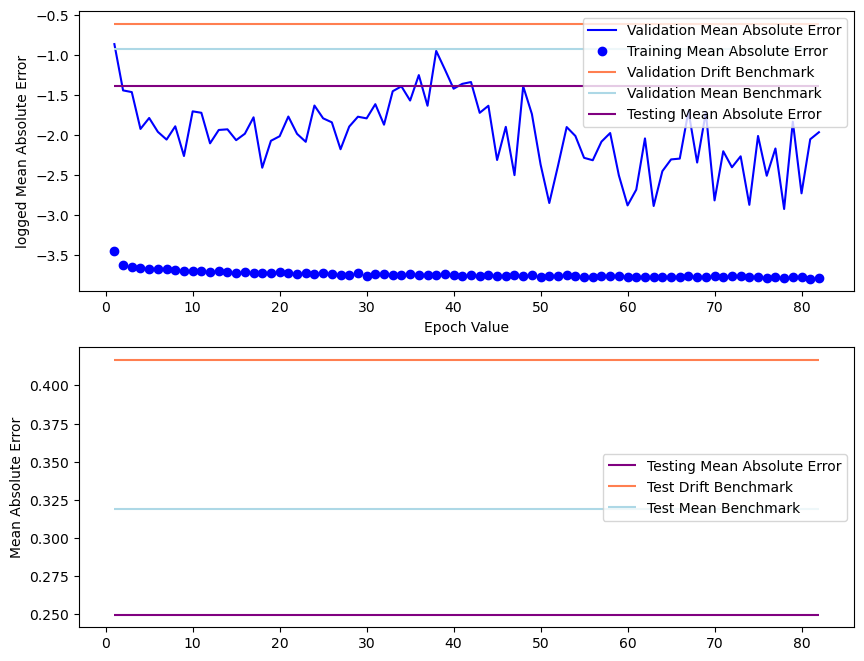

11/11 [==============================] - 0s 5ms/step


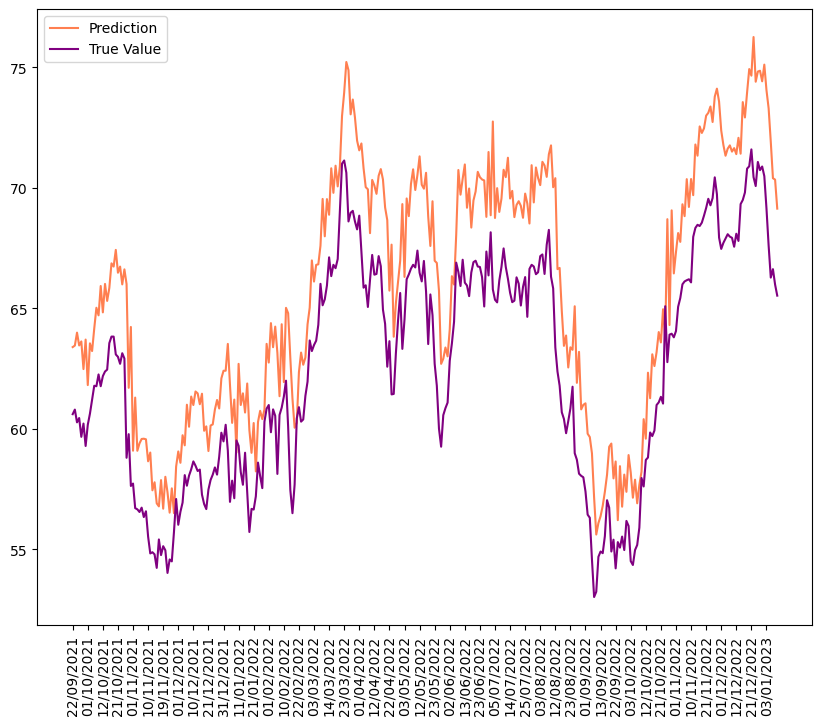

In [93]:
### Simple RNN:
optimizer=optimizers.RMSprop()
model_RNN=models.Sequential()
model_RNN.add(layers.SimpleRNN(32,input_shape=(lag,1),activation='relu'))
model_RNN.add(layers.Dense(1))

model_RNN.compile(optimizer=optimizer,loss='mse',metrics=['mae'])

Rnn_history=model_RNN.fit(X_train.reshape(-1,lag,1),y_train.flatten(),batch_size=18,epochs=82,
                  validation_data=(X_validation.reshape(-1,lag,1),y_validation.flatten()))

training_performance(model_RNN,Rnn_history,82)
plot_prediction(model_RNN,'AZN.Close')

Epoch 1/82
128/128 [==============================] - 4s 15ms/step - loss: 0.0247 - mae: 0.0865 - val_loss: 0.0533 - val_mae: 0.1904
Epoch 2/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0034 - mae: 0.0430 - val_loss: 0.1948 - val_mae: 0.2912
Epoch 3/82
128/128 [==============================] - 1s 12ms/step - loss: 0.0030 - mae: 0.0401 - val_loss: 0.3901 - val_mae: 0.4168
Epoch 4/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0027 - mae: 0.0380 - val_loss: 0.9257 - val_mae: 0.6733
Epoch 5/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0024 - mae: 0.0358 - val_loss: 0.5050 - val_mae: 0.5139
Epoch 6/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0023 - mae: 0.0349 - val_loss: 0.5171 - val_mae: 0.5533
Epoch 7/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0022 - mae: 0.0342 - val_loss: 0.1893 - val_mae: 0.3493
Epoch 8/82
128/128 [==============================] - 1s 12ms/step - 

128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0529 - val_mae: 0.1448
Epoch 63/82
128/128 [==============================] - 1s 12ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0736 - val_mae: 0.1711
Epoch 64/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0587 - val_mae: 0.1516
Epoch 65/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0480 - val_mae: 0.1340
Epoch 66/82
128/128 [==============================] - 2s 13ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0876 - val_mae: 0.1817
Epoch 67/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0717 - val_mae: 0.1618
Epoch 68/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0972 - val_mae: 0.1859
Epoch 69/82
128/128 [==============================] - 2s 12ms/step - loss

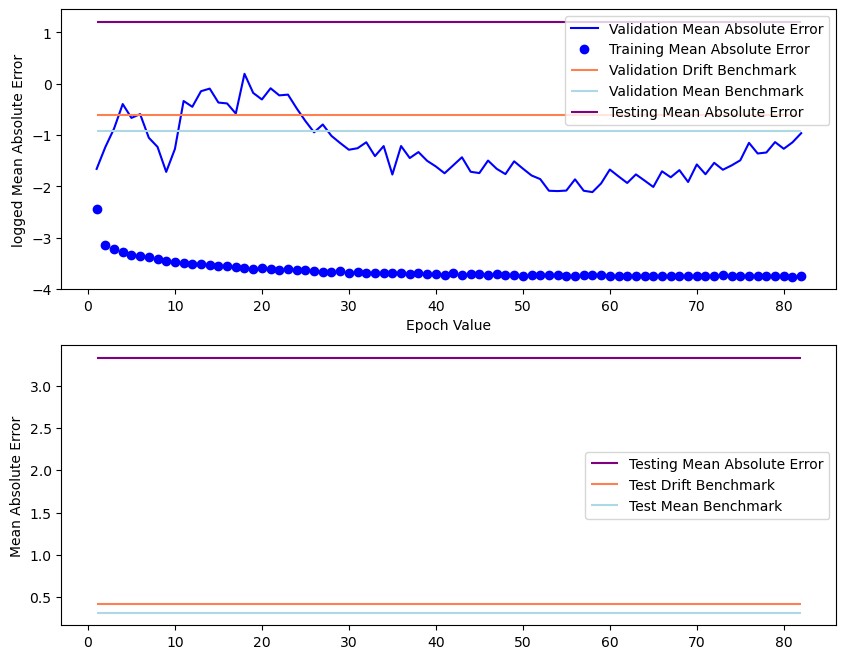

11/11 [==============================] - 0s 6ms/step


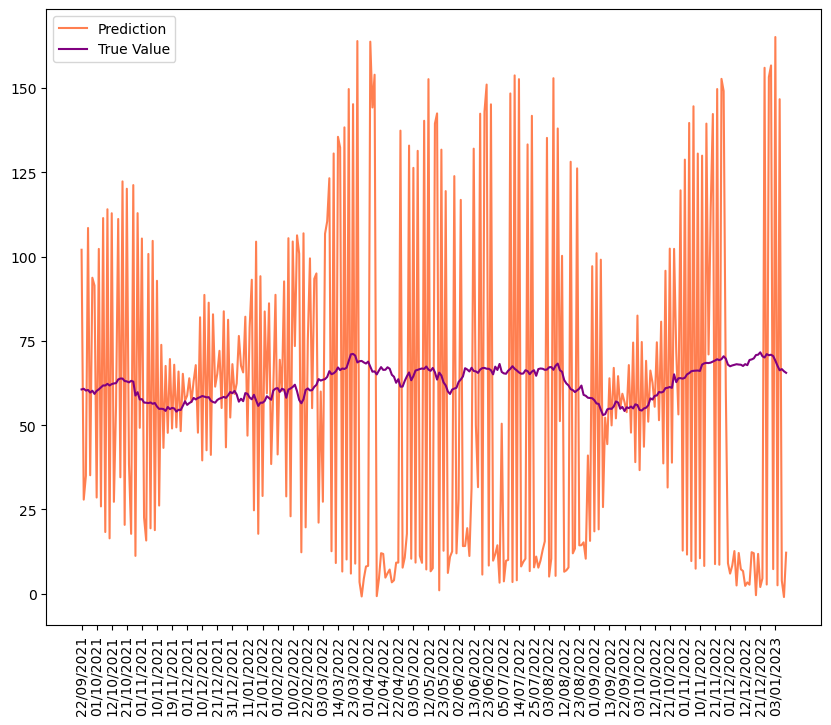

In [91]:
### LSTM:
model_LSTM=models.Sequential()
model_LSTM.add(layers.LSTM(32,input_shape=(lag,1),activation='relu'))
model_LSTM.add(layers.Dense(1))
model_LSTM.compile(optimizer=optimizers.RMSprop(),loss='mse',metrics=['mae'])

history_LSTM=model_LSTM.fit(X_train.reshape(-1,lag,1),y_train.flatten(),batch_size=18,epochs=82,
                  validation_data=(X_validation.reshape(-1,lag,1),y_validation.flatten()))

training_performance(model_LSTM,history_LSTM,82)
plot_prediction(model_LSTM,'AZN.Close')

Epoch 1/82
128/128 [==============================] - 3s 13ms/step - loss: 0.0472 - mae: 0.1111 - val_loss: 0.4241 - val_mae: 0.5620
Epoch 2/82
128/128 [==============================] - 1s 12ms/step - loss: 0.0017 - mae: 0.0295 - val_loss: 0.3729 - val_mae: 0.5259
Epoch 3/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0016 - mae: 0.0284 - val_loss: 0.3304 - val_mae: 0.4927
Epoch 4/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 0.2802 - val_mae: 0.4505
Epoch 5/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0014 - mae: 0.0261 - val_loss: 0.2821 - val_mae: 0.4514
Epoch 6/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0014 - mae: 0.0259 - val_loss: 0.2521 - val_mae: 0.4247
Epoch 7/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0013 - mae: 0.0256 - val_loss: 0.2549 - val_mae: 0.4277
Epoch 8/82
128/128 [==============================] - 1s 10ms/step - 

128/128 [==============================] - 1s 11ms/step - loss: 0.0012 - mae: 0.0234 - val_loss: 0.2227 - val_mae: 0.3950
Epoch 63/82
128/128 [==============================] - 1s 12ms/step - loss: 0.0012 - mae: 0.0236 - val_loss: 0.2181 - val_mae: 0.3902
Epoch 64/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0235 - val_loss: 0.2210 - val_mae: 0.3931
Epoch 65/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0012 - mae: 0.0235 - val_loss: 0.2520 - val_mae: 0.4235
Epoch 66/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0236 - val_loss: 0.2254 - val_mae: 0.3979
Epoch 67/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.2377 - val_mae: 0.4098
Epoch 68/82
128/128 [==============================] - 2s 12ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.2292 - val_mae: 0.4011
Epoch 69/82
128/128 [==============================] - 2s 12ms/step - loss

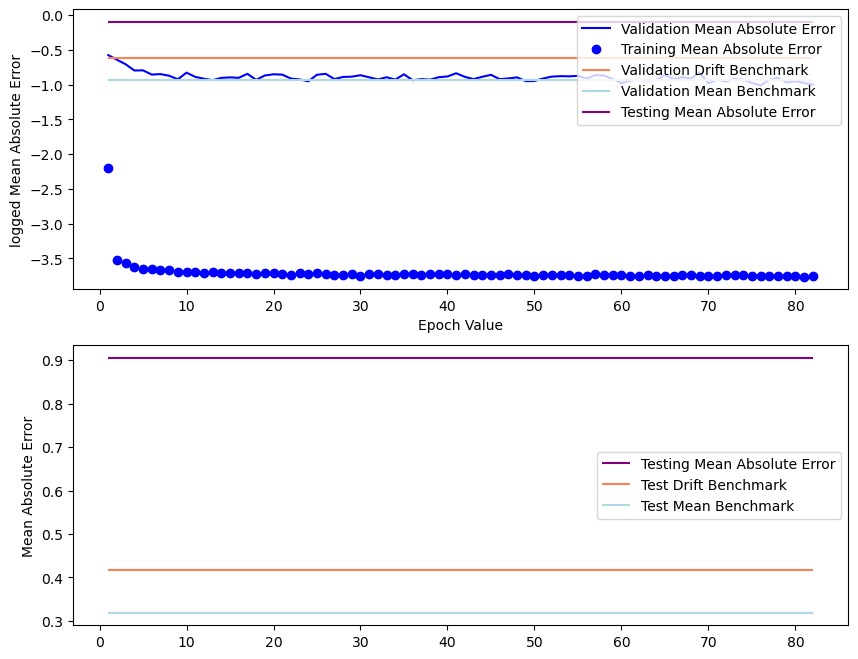

11/11 [==============================] - 0s 6ms/step


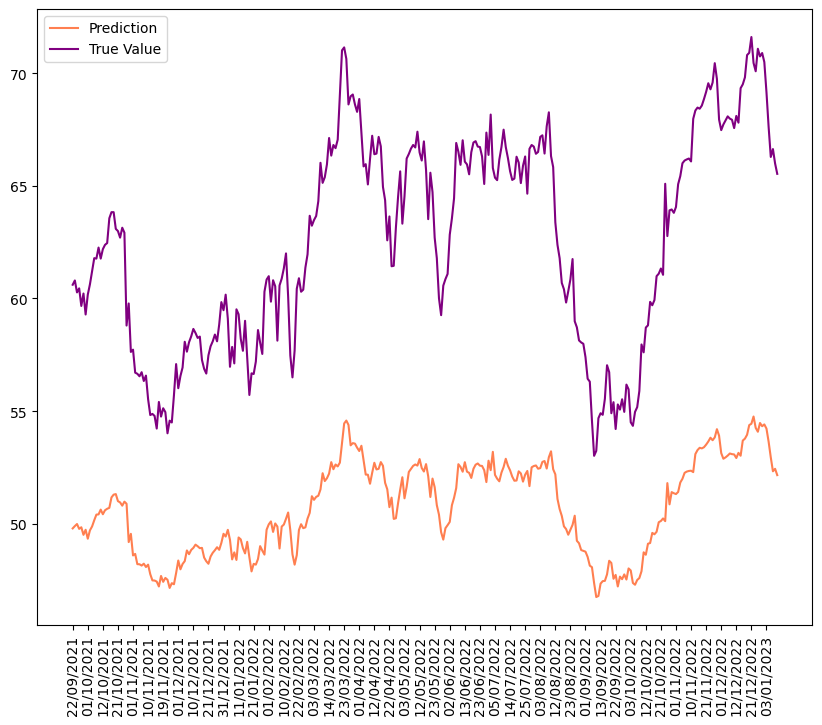

In [90]:
### GRU:
model_GRU=models.Sequential()
model_GRU.add(layers.GRU(32,input_shape=(lag,1),activation='relu'))
model_GRU.add(layers.Dense(1))
model_GRU.compile(optimizer=optimizers.RMSprop(),loss='mse',metrics=['mae'])

history_GRU=model_GRU.fit(X_train.reshape(-1,lag,1),y_train.flatten(),batch_size=18,epochs=82,
                  validation_data=(X_validation.reshape(-1,lag,1),y_validation.flatten()))

training_performance(model_GRU,history_GRU,82)
plot_prediction(model_GRU,'AZN.Close')

Epoch 1/82
128/128 [==============================] - 3s 12ms/step - loss: 0.0730 - mae: 0.0731 - val_loss: 0.3016 - val_mae: 0.4475
Epoch 2/82
128/128 [==============================] - 1s 7ms/step - loss: 0.0366 - mae: 0.0419 - val_loss: 0.1948 - val_mae: 0.3647
Epoch 3/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0216 - mae: 0.0385 - val_loss: 0.2528 - val_mae: 0.4334
Epoch 4/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0139 - mae: 0.0396 - val_loss: 0.1956 - val_mae: 0.3738
Epoch 5/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0116 - mae: 0.0389 - val_loss: 0.2756 - val_mae: 0.4529
Epoch 6/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0104 - mae: 0.0399 - val_loss: 0.1380 - val_mae: 0.3146
Epoch 7/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0095 - mae: 0.0408 - val_loss: 0.0540 - val_mae: 0.1815
Epoch 8/82
128/128 [==============================] - 1s 8ms/step - loss: 0

128/128 [==============================] - 1s 8ms/step - loss: 0.0043 - mae: 0.0361 - val_loss: 0.1048 - val_mae: 0.2824
Epoch 63/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0043 - mae: 0.0359 - val_loss: 0.1711 - val_mae: 0.3614
Epoch 64/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0042 - mae: 0.0359 - val_loss: 0.0145 - val_mae: 0.0827
Epoch 65/82
128/128 [==============================] - 1s 7ms/step - loss: 0.0042 - mae: 0.0357 - val_loss: 0.6064 - val_mae: 0.6780
Epoch 66/82
128/128 [==============================] - 1s 7ms/step - loss: 0.0041 - mae: 0.0350 - val_loss: 0.0248 - val_mae: 0.1213
Epoch 67/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0042 - mae: 0.0359 - val_loss: 0.1396 - val_mae: 0.3247
Epoch 68/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0042 - mae: 0.0359 - val_loss: 0.0983 - val_mae: 0.2704
Epoch 69/82
128/128 [==============================] - 1s 8ms/step - loss: 0.0041

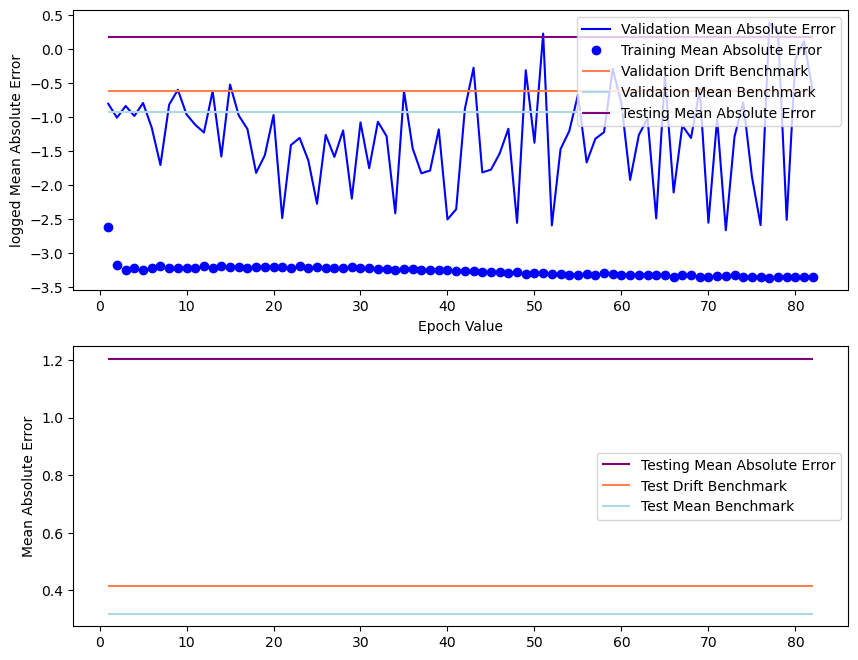

11/11 [==============================] - 0s 3ms/step


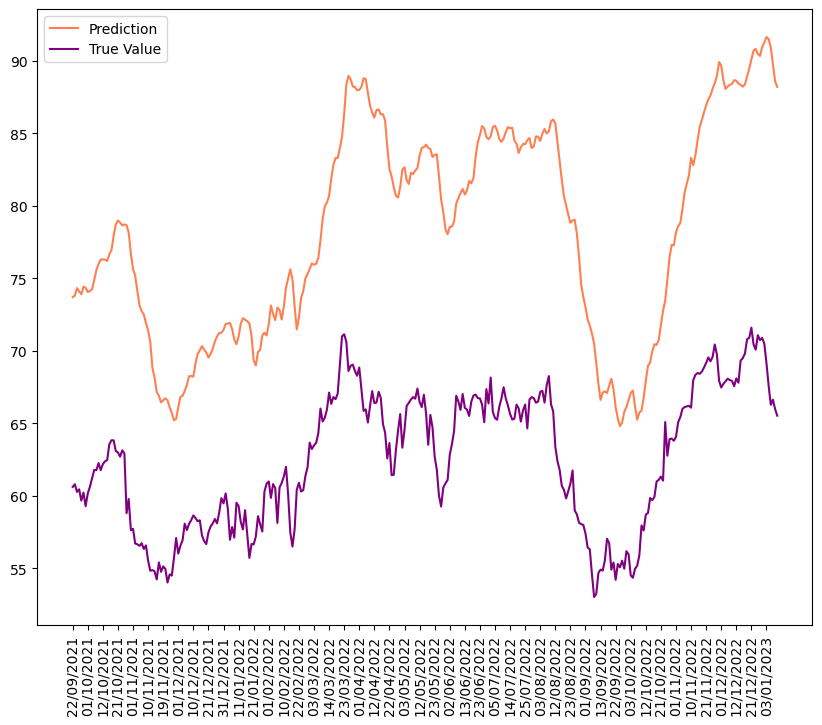

In [87]:
### apply regulation on RNN:
### L1 regulation:
optimizer=optimizers.RMSprop()
model_RNN_L1=models.Sequential()
model_RNN_L1.add(layers.SimpleRNN(32, activation='relu', input_shape=(lag,1)))
model_RNN_L1.add(layers.Dense(1, activation='linear', kernel_regularizer='l1'))

model_RNN_L1.compile(optimizer=optimizer,loss='mse',metrics=['mae'])

history_RNN_L1=model_RNN_L1.fit(X_train.reshape(-1,lag,1),y_train.flatten(),batch_size=18,epochs=82,
                  validation_data=(X_validation.reshape(-1,lag,1),y_validation.flatten()))

training_performance(model_RNN_L1,history_RNN_L1,82)
plot_prediction(model_RNN_L1,'AZN.Close')

In [106]:
print('training RMSE:', math.sqrt(np.square(history_RNN_L1.history['loss']).mean()))
print('testing RMSE:', math.sqrt(np.square(history_RNN_L1.history['val_loss']).mean()))

training RMSE: 0.010856092317283548
testing RMSE: 0.5713360715104482


Epoch 1/82
128/128 [==============================] - 6s 17ms/step - loss: 0.2918 - mae: 0.2824 - val_loss: 0.0887 - val_mae: 0.2388
Epoch 2/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0150 - mae: 0.0408 - val_loss: 0.0695 - val_mae: 0.2123
Epoch 3/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0105 - mae: 0.0376 - val_loss: 0.1283 - val_mae: 0.3092
Epoch 4/82
128/128 [==============================] - 1s 9ms/step - loss: 0.0085 - mae: 0.0374 - val_loss: 0.0439 - val_mae: 0.1648
Epoch 5/82
128/128 [==============================] - 1s 11ms/step - loss: 0.0073 - mae: 0.0360 - val_loss: 0.0943 - val_mae: 0.2614
Epoch 6/82
128/128 [==============================] - 1s 10ms/step - loss: 0.0064 - mae: 0.0358 - val_loss: 0.0420 - val_mae: 0.1675
Epoch 7/82
128/128 [==============================] - 1s 10ms/step - loss: 0.0058 - mae: 0.0351 - val_loss: 0.0240 - val_mae: 0.1182
Epoch 8/82
128/128 [==============================] - 1s 9ms/step - los

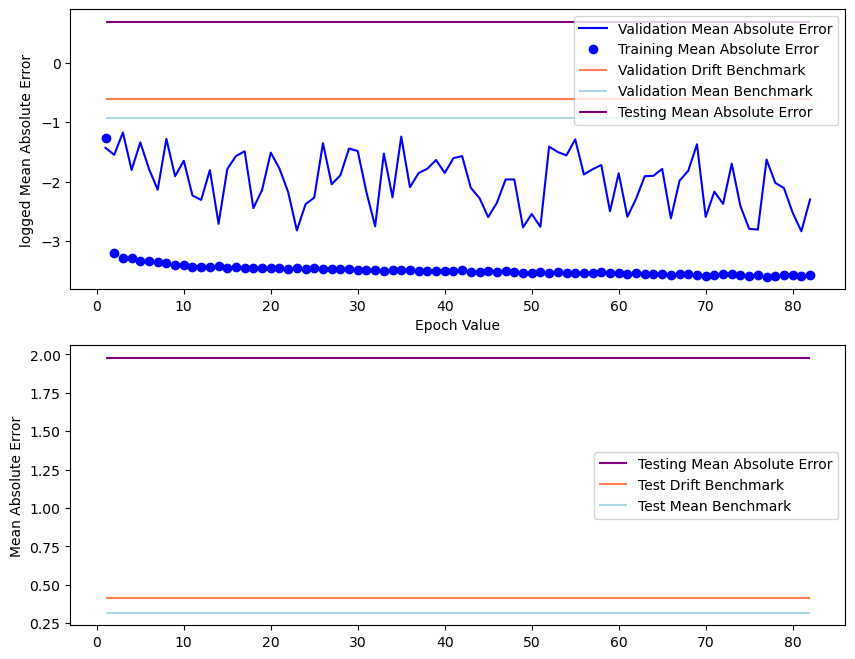

11/11 [==============================] - 0s 4ms/step


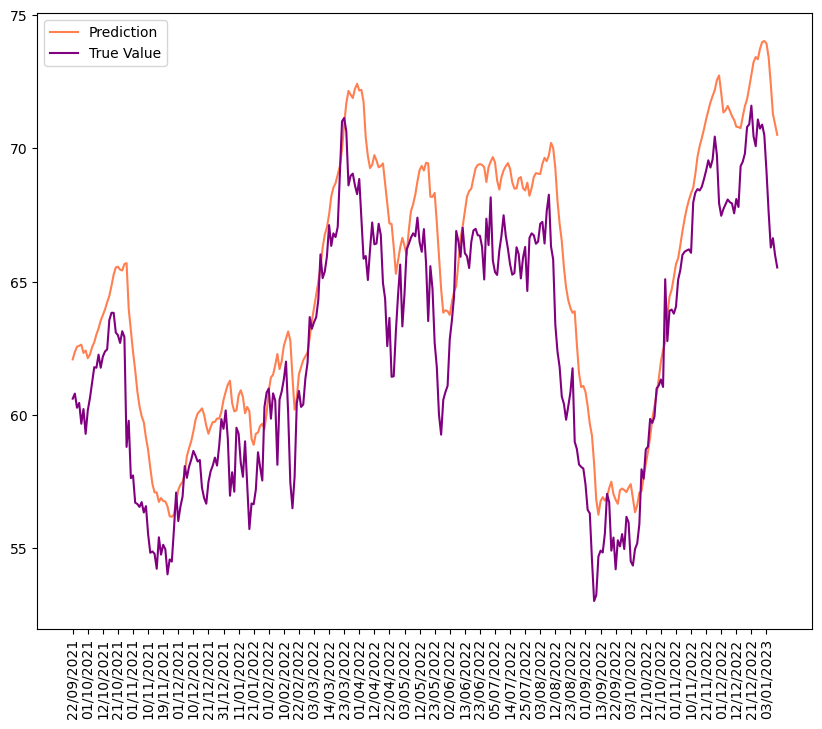

In [56]:
## apply L2 to RNN:
optimizer=optimizers.RMSprop()
model_RNN_L2=models.Sequential()
model_RNN_L2.add(layers.SimpleRNN(32, activation='relu', input_shape=(lag,1)))
model_RNN_L2.add(layers.Dense(1, activation='linear', kernel_regularizer='l2'))
model_RNN_L2.compile(optimizer=optimizer,loss='mse',metrics=['mae'])

history_RNN_L2=model_RNN_L2.fit(X_train.reshape(-1,lag,1),y_train.flatten(),batch_size=18,epochs=82,
                  validation_data=(X_validation.reshape(-1,lag,1),y_validation.flatten()))

training_performance(model_RNN_L1,history_RNN_L2,82)
plot_prediction(model_RNN_L2,'AZN.Close')

In [107]:
print('training RMSE:', math.sqrt(np.square(history_RNN_L2.history['loss']).mean()))
print('testing RMSE:', math.sqrt(np.square(history_RNN_L2.history['val_loss']).mean()))

training RMSE: 0.032416972889233786
testing RMSE: 0.046631832712572784
